In [1]:
import pandas as pd

In [2]:
friday= pd.read_csv('friday.csv', sep= ';')

In [3]:
friday.head()

,timestamp,customer_no,location
0,2019-09-06 07:00:00,1,dairy
1,2019-09-06 07:00:00,2,drinks
2,2019-09-06 07:00:00,3,fruit
3,2019-09-06 07:01:00,2,checkout
4,2019-09-06 07:01:00,4,drinks


In [4]:
thursday= pd.read_csv('thursday.csv', sep= ';')

In [5]:
monday= pd.read_csv('monday.csv', sep= ';')

In [6]:
tuesday= pd.read_csv('tuesday.csv', sep= ';')

In [7]:
wednsday= pd.read_csv('wednesday.csv', sep= ';')

In [8]:
monday['customer_number']= monday['customer_no'].apply(lambda x: '{}{}'.format('mon_', x))

In [9]:
monday.head()

,timestamp,customer_no,location,customer_number
0,2019-09-02 07:03:00,1,dairy,mon_1
1,2019-09-02 07:03:00,2,dairy,mon_2
2,2019-09-02 07:04:00,3,dairy,mon_3
3,2019-09-02 07:04:00,4,dairy,mon_4
4,2019-09-02 07:04:00,5,spices,mon_5


In [10]:
tuesday['customer_number']= tuesday['customer_no'].apply(lambda x: '{}{}'.format('tue_', x))

In [11]:
tuesday.head()

,timestamp,customer_no,location,customer_number
0,2019-09-03 07:02:00,1,fruit,tue_1
1,2019-09-03 07:02:00,2,drinks,tue_2
2,2019-09-03 07:03:00,3,dairy,tue_3
3,2019-09-03 07:05:00,1,drinks,tue_1
4,2019-09-03 07:06:00,4,dairy,tue_4


In [12]:
friday.index=pd.to_datetime(friday.index)

In [13]:
wednsday.tail()

,timestamp,customer_no,location
5045,2019-09-04 21:48:00,1528,spices
5046,2019-09-04 21:49:00,1520,dairy
5047,2019-09-04 21:49:00,1529,dairy
5048,2019-09-04 21:49:00,1530,fruit
5049,2019-09-04 21:49:00,1531,checkout


In [14]:
thursday['customer_number']= thursday['customer_no'].apply(lambda x: '{}{}'.format('thur_', x))

In [15]:
friday['customer_number']= friday['customer_no'].apply(lambda x: '{}{}'.format('fri_', x))

In [16]:
friday.head()

,timestamp,customer_no,location,customer_number
1970-01-01 00:00:00.000000000,2019-09-06 07:00:00,1,dairy,fri_1
1970-01-01 00:00:00.000000001,2019-09-06 07:00:00,2,drinks,fri_2
1970-01-01 00:00:00.000000002,2019-09-06 07:00:00,3,fruit,fri_3
1970-01-01 00:00:00.000000003,2019-09-06 07:01:00,2,checkout,fri_2
1970-01-01 00:00:00.000000004,2019-09-06 07:01:00,4,drinks,fri_4


In [17]:
#Calculate the total number of customers in each section

In [18]:
fri_location=friday.groupby(['location']).count()

In [19]:
fri_location

,timestamp,customer_no,customer_number
location,,,
checkout,1502,1502,1502
dairy,932,932,932
drinks,844,844,844
fruit,1057,1057,1057
spices,790,790,790


In [20]:
#Calculate the total number of customers in each section over time

friday.head()

,timestamp,customer_no,location,customer_number
1970-01-01 00:00:00.000000000,2019-09-06 07:00:00,1,dairy,fri_1
1970-01-01 00:00:00.000000001,2019-09-06 07:00:00,2,drinks,fri_2
1970-01-01 00:00:00.000000002,2019-09-06 07:00:00,3,fruit,fri_3
1970-01-01 00:00:00.000000003,2019-09-06 07:01:00,2,checkout,fri_2
1970-01-01 00:00:00.000000004,2019-09-06 07:01:00,4,drinks,fri_4


In [21]:
friday=friday.set_index('timestamp')


In [22]:
friday.index=pd.to_datetime(friday.index)

In [23]:
friday['location'].unique()

array(['dairy', 'drinks', 'fruit', 'checkout', 'spices'], dtype=object)

In [24]:
fri_num_customer_per_loc=friday.groupby(['location']).resample('1H').count()

In [25]:
df= fri_num_customer_per_loc.drop(labels=["customer_no", "location"], axis=1)

In [26]:
#import seaborn as sns
#import matplotlib as plt

In [27]:
df.head()

customer_number
location timestamp                           
checkout 2019-09-06 07:00:00               87
         2019-09-06 08:00:00              132
         2019-09-06 09:00:00               82
         2019-09-06 10:00:00               80
         2019-09-06 11:00:00               79

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75 entries, ('checkout', Timestamp('2019-09-06 07:00:00', freq='H')) to ('spices', Timestamp('2019-09-06 21:00:00', freq='H'))
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   customer_number  75 non-null     int64
dtypes: int64(1)
memory usage: 1.7+ KB


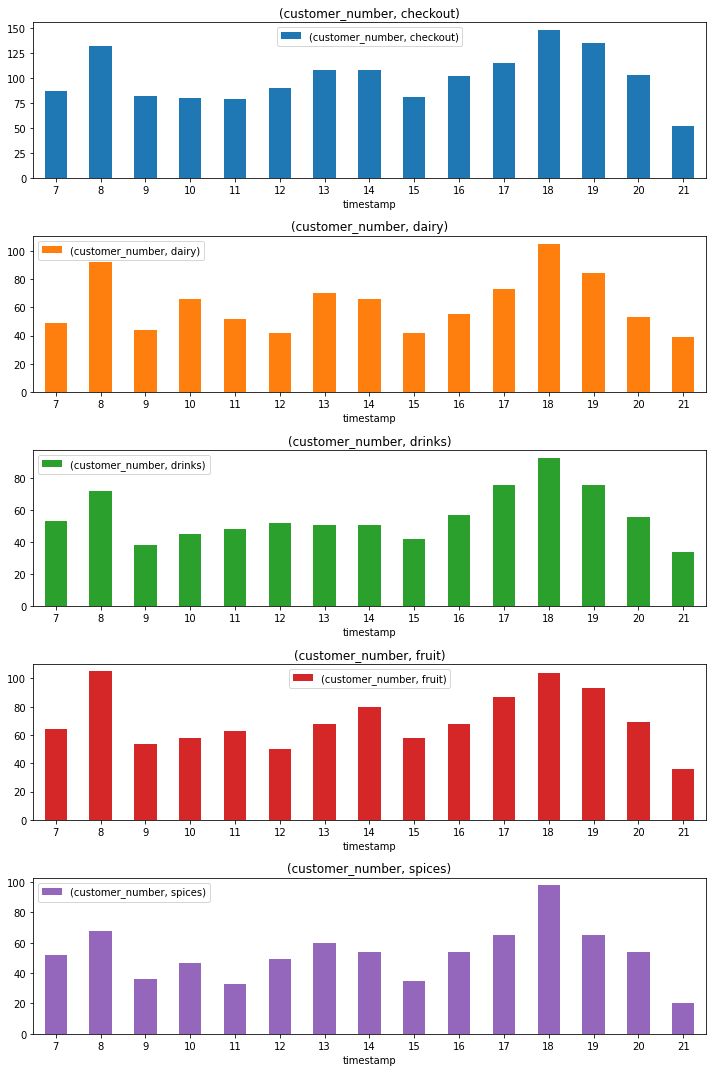

In [68]:
import pylab as plt

import matplotlib.dates as mdates

fig=plt.figure(figsize=(10,15))
axes=[]
axes.append(fig.add_subplot(511))
axes.append(fig.add_subplot(512))
axes.append(fig.add_subplot(513))
axes.append(fig.add_subplot(514))
axes.append(fig.add_subplot(515))

df.unstack(level= 0).plot(kind= "bar", subplots= True, rot=0, 
                              figsize=(6,20), ax=axes);


import numpy as np
for ax in axes:
    ax.set_xticklabels(np.arange(7,22,1))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
    #ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H"))
plt.tight_layout()

In [70]:
df.unstack(level= 0)

customer_number                          
location                   checkout dairy drinks fruit spices
timestamp                                                    
2019-09-06 07:00:00              87    49     53    64     52
2019-09-06 08:00:00             132    92     72   105     68
2019-09-06 09:00:00              82    44     38    54     36
2019-09-06 10:00:00              80    66     45    58     47
2019-09-06 11:00:00              79    52     48    63     33
2019-09-06 12:00:00              90    42     52    50     49
2019-09-06 13:00:00             108    70     51    68     60
2019-09-06 14:00:00             108    66     51    80     54
2019-09-06 15:00:00              81    42     42    58     35
2019-09-06 16:00:00             102    55     57    68     54
2019-09-06 17:00:00             115    73     76    87     65
2019-09-06 18:00:00             148   105     93   104     98
2019-09-06 19:00:00             135    84     76    93     65
2019-09-06 20:00:00             103    53     56    69     54
2019-09-06 21:00:00              52    39     34    36     20

In [65]:
df

customer_number
location timestamp                           
checkout 2019-09-06 07:00:00               87
         2019-09-06 08:00:00              132
         2019-09-06 09:00:00               82
         2019-09-06 10:00:00               80
         2019-09-06 11:00:00               79
...                                       ...
spices   2019-09-06 17:00:00               65
         2019-09-06 18:00:00               98
         2019-09-06 19:00:00               65
         2019-09-06 20:00:00               54
         2019-09-06 21:00:00               20

[75 rows x 1 columns]

In [ ]:
# Initialize a new figure
fig, ax = plt.subplots()
